In [1]:
# General stuff
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.core.debugger import Tracer

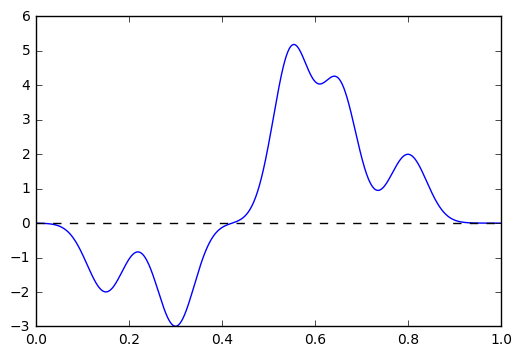

In [2]:
# Create an example dataset

pm=[0.15,0.3,0.55,0.65,0.8]
v=0.04
ph=[-0.2,-0.3,0.5,0.4,0.2]
x=np.linspace(0,1,1000)
y=np.zeros(x.shape)
for m,h in zip(pm,ph):
    y+=norm.pdf(x,loc=m,scale=v)*h

plt.plot(x,y,'b')
plt.plot([0,1],[0,0],'k--')
plt.show()

In [5]:
# Build neighbor structure

neigh=np.ndarray(len(x),dtype=object)
for nb in np.arange(0,len(x)):
    if nb>1 and nb<len(x)-1:
        neigh[nb]=[nb-1,nb+1]
    elif nb==1:
        neigh[nb]=nb+1
    else:
        neigh[nb]=nb-1

In [46]:
data=y
ind=np.argsort(data)
clust=np.zeros(data.shape[0],dtype=int)
nclust=0;
start=0
stop=len(data)-1

while start-stop<1:

    # Retrieve cluster assignment of neighbors
    start_neigh_clust=clust[neigh[ind[start]]]
    stop_neigh_clust=clust[neigh[ind[stop]]]

    # How many clusters is it touching?        
    start_neigh_unique=np.unique(start_neigh_clust)
    start_neigh_valid=start_neigh_unique[start_neigh_unique>0] # Remove border and unassigned vertices
    stop_neigh_unique=np.unique(stop_neigh_clust)
    stop_neigh_valid=stop_neigh_unique[stop_neigh_unique>0] # Remove border and unassigned vertices

    # Is this a new cluster?
    if len(start_neigh_valid)==0:
        nclust+=1
        clust[ind[start]]=nclust
        start+=1
    if len(stop_neigh_valid)==0:
        nclust+=1
        clust[ind[stop]]=nclust
        stop-=1

    # No, is it a border vertice (does it touch more than one cluster or only a border)?
    if len(start_neigh_valid) > 1:
        clust[ind[start]]=-1
        start+=1
    if len(stop_neigh_valid) > 1:
        clust[ind[stop]]=-1
        stop-=1

    # No, then assign it to the unique cluster it touches
    if len(start_neigh_valid)==1 and len(stop_neigh_valid)==1:
        start_dist=np.abs(data[ind[start]]-np.mean(data[clust==start_neigh_valid[0]]))
        stop_dist=np.abs(data[ind[stop]]-np.mean(data[clust==stop_neigh_valid[0]]))
        if start_dist>stop_dist:
            clust[ind[start]]=start_neigh_valid[0]
            start+=1
        elif stop_dist>start_dist:
            clust[ind[stop]]=stop_neigh_valid[0]
            stop-=1
        else:
            clust[ind[start]]=start_neigh_valid[0]
            clust[ind[stop]]=stop_neigh_valid[0]
            start+=1
            stop-=1
    else:
        if len(start_neigh_valid)==1:
            clust[ind[start]]=start_neigh_valid[0]
            start+=1
        if len(stop_neigh_valid)==1:
            clust[ind[stop]]=stop_neigh_valid[0]
            stop-=1

if np.sum(clust==0)>0:
    raise ValueError("Unassigned vertice detected.")

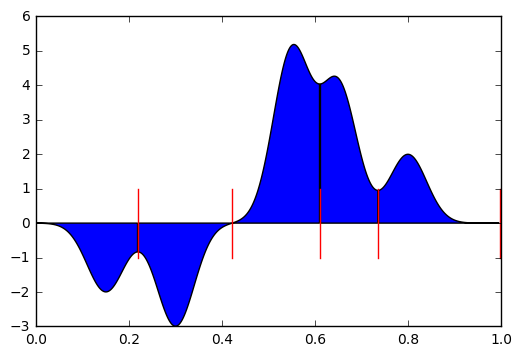

In [47]:
clid=np.unique(clust)
clid=clid[clid!=-1]
for cl in clid:
    xi=np.where(clust==cl)
    xc=np.hstack((x[xi],x[xi][::-1]))
    yc=np.hstack((y[xi],np.zeros(len(xi[0]))))
    plt.fill(xc,yc,'b')
for xi in x[np.where(clust==-1)]:
    plt.plot([xi,xi],[-1,1],'r')
plt.show()

How many steps? 1000
None
> <ipython-input-34-870a3e550981>(18)<module>()
     16 
     17         # Retrieve cluster assignment of neighbors
---> 18         start_neigh_clust=clust[neigh[ind[start]]]
     19         stop_neigh_clust=clust[neigh[ind[stop]]]
     20 

ipdb> q


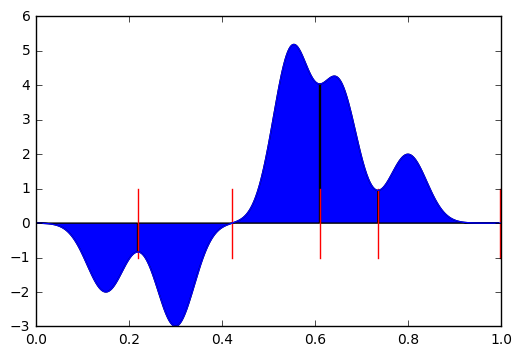

In [34]:
data=y
ind=np.argsort(data)
clust=np.zeros(data.shape[0],dtype=int)
nclust=0;
start=0
stop=len(data)-1

while start-stop<1:

    nsteps = int(input('How many steps? '))
    
    for ns in np.arange(0,nsteps):
    
        if ind[start]==0:
            Tracer()()
    
        # Retrieve cluster assignment of neighbors
        start_neigh_clust=clust[neigh[ind[start]]]
        stop_neigh_clust=clust[neigh[ind[stop]]]

        # How many clusters is it touching?        
        start_neigh_unique=np.unique(start_neigh_clust)
        start_neigh_valid=start_neigh_unique[start_neigh_unique>0] # Remove border and unassigned vertices
        stop_neigh_unique=np.unique(stop_neigh_clust)
        stop_neigh_valid=stop_neigh_unique[stop_neigh_unique>0] # Remove border and unassigned vertices

        # Is this a new cluster?
        if len(start_neigh_valid)==0:
            nclust+=1
            clust[ind[start]]=nclust
            start+=1
        if len(stop_neigh_valid)==0:
            nclust+=1
            clust[ind[stop]]=nclust
            stop-=1

        # No, is it a border vertice (does it touch more than one cluster or only a border)?
        if len(start_neigh_valid) > 1:
            clust[ind[start]]=-1
            start+=1
        if len(stop_neigh_valid) > 1:
            clust[ind[stop]]=-1
            stop-=1

        # No, then assign it to the unique cluster it touches
        if len(start_neigh_valid)==1 and len(stop_neigh_valid)==1:
            start_dist=np.abs(data[ind[start]]-np.mean(data[clust==start_neigh_valid[0]]))
            stop_dist=np.abs(data[ind[stop]]-np.mean(data[clust==stop_neigh_valid[0]]))
            if start_dist>stop_dist:
                clust[ind[start]]=start_neigh_valid[0]
                start+=1
            elif stop_dist>start_dist:
                clust[ind[stop]]=stop_neigh_valid[0]
                stop-=1
            else:
                clust[ind[start]]=start_neigh_valid[0]
                clust[ind[stop]]=stop_neigh_valid[0]
                start+=1
                stop-=1
        else:
            if len(start_neigh_valid)==1:
                clust[ind[start]]=start_neigh_valid[0]
                start+=1
            if len(stop_neigh_valid)==1:
                clust[ind[stop]]=stop_neigh_valid[0]
                stop-=1
        
        if start-stop>1:
            break
                
    clid=np.unique(clust)
    clid=clid[np.logical_and(clid!=-1,clid!=0)]
    for cl in clid:
        xi=np.where(clust==cl)
        xc=np.hstack((x[xi],x[xi][::-1]))
        yc=np.hstack((y[xi],np.zeros(len(xi[0]))))
        plt.fill(xc,yc,'b')
    for xi in x[np.where(clust==-1)]:
        plt.plot([xi,xi],[-1,1],'r')
    plt.plot(x,y)
    plt.show()        
        
if np.sum(clust==0)>0:
    raise ValueError("Unassigned vertice detected.")

